<a href="https://colab.research.google.com/github/somesh-kb/Hyperparameter-Search-Sequential-Model-Based-Optimization/blob/main/Creep_Bagging_%26_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv(r'/content/drive/MyDrive/Ni-based-alloys-Creep-Data.csv')
df = pd.DataFrame(file)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Comp-C', 'Comp-Si', 'Comp-Mn', 'Comp-P', 'Comp-S',
       'Comp-Cr', 'Comp-Mo', 'Comp-Cu', 'Comp-Al total.', 'Comp-N total',
       'Comp-Ti', 'Comp-B', 'Comp-Nb+Ta', 'Comp-W', 'Comp-Co', 'Comp-Fe',
       'Comp-Zr', 'Test temperature', 'Test stress', 'Time to rupture', 'Temp',
       'Time', 'C-val', 'Si-val', 'Mn-val', 'P-val', 'S-val', 'Cr-val',
       'Mo-val', 'Cu-val', 'Al-val', 'N-val', 'Ti-val', 'B-val', 'Nb-val',
       'Ta-val', 'W-val', 'Co-val', 'Fe-val', 'Zr-val', 'C-en', 'Si-en',
       'Mn-en', 'P-en', 'S-en', 'Cr-en', 'Mo-en', 'Cu-en', 'Al-en', 'N-en',
       'Ti-en', 'B-en', 'Nb-en', 'Ta-en', 'W-en', 'Co-en', 'Fe-en', 'Zr-en'],
      dtype='object')


In [ ]:
X = df[['Comp-C', 'Comp-Si', 'Comp-Mn', 'Comp-P', 'Comp-S','Comp-Cr', 'Comp-Mo', 'Comp-Cu', 'Comp-Al total.', 'Comp-N total',
       'Comp-Ti', 'Comp-B', 'Comp-Nb+Ta', 'Comp-W', 'Comp-Co', 'Comp-Fe', 'Comp-Zr', 'Test temperature', 'Test stress']]

In [ ]:
Y = np.log(df['Time to rupture'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()

print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


# **RandomizedSearchCV**

#**Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

#bootstrap=['True','False']
#ccp_alpha=[np.arange(0,3,0.1)]
criterion=['mse','mae']
max_depth = [int(x) for x in np.arange(2,30,1)]
max_leaf_nodes = [int(x) for x in np.arange(2,30,1)]
min_samples_leaf = [int(x) for x in np.arange(2,20,1)]
#max_samples=[int(x) for x in np.arange(5,40,1)]
#min_impurity_split=[np.arange(0,1,0.1)]
#min_samples_split=[int(x) for x in np.arange(1,20,1)]
n_estimators=[int(x) for x in np.arange(50,1001,10)]
#min_weight_fraction_leaf = [np.arange(0,1.5,0.1)]
max_features = ['auto','sqrt','log2']

param_grid = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes,#'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf, 'max_features':max_features, 'n_estimators':n_estimators}

bs_cv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_iter=100,cv=10,n_jobs=-1,return_train_score=True,random_state=111)
bs_cv.fit(X_train,Y_train)
print(bs_cv.best_params_)

{'n_estimators': 490, 'min_samples_leaf': 5, 'max_leaf_nodes': 27, 'max_features': 'auto', 'max_depth': 11, 'criterion': 'mse'}


In [ ]:
rf = RandomForestRegressor(n_estimators=490, max_leaf_nodes=27, max_features='auto', max_depth=11,min_samples_leaf=5,
                           criterion='mae',random_state=33)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

0.518774735216376
1.3778221252473324


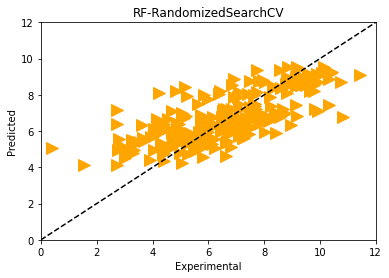

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(0,14,1)
y=x
plt.plot(Y_test,Y_pred,linestyle='none',marker='>',color='orange',ms=12)
plt.plot(x,y,linestyle='--',color='black')
plt.title('RF-RandomizedSearchCV')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('RF-RandomizedSearchCV.jpg')
plt.show()

#**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

print(gb.get_params)

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>


In [ ]:
alpha=[x for x in np.arange(0.1,2.5,0.05)]
criterion=['friedman_mse','mse','mae']
learning_rate=[x for x in np.arange(0.1,1,0.01)]
loss=['ls','huber','lad','quantile']
max_depth=[int(x) for x in np.arange(2,30,1)]
max_features = ['auto','sqrt','log2']
max_leaf_nodes=[int(x) for x in np.arange(2,30,1)]
n_estimators=[int(x) for x in np.arange(50,1000,10)]

param_grid = {'alpha':alpha,'criterion':criterion,'learning_rate':learning_rate,'loss':loss,
              'max_depth':max_depth,'max_features':max_features,'max_leaf_nodes':max_leaf_nodes,'n_estimators':n_estimators}

In [ ]:
rs_cv = RandomizedSearchCV(estimator=gb,param_distributions=param_grid,n_iter=100,n_jobs=-1,cv=10,random_state=121,return_train_score=True)
rs_cv.fit(X_train,Y_train)
print(rs_cv.best_params_)

{'n_estimators': 990, 'max_leaf_nodes': 19, 'max_features': 'log2', 'max_depth': 3, 'loss': 'ls', 'learning_rate': 0.5299999999999998, 'criterion': 'friedman_mse', 'alpha': 0.40000000000000013}


In [ ]:
gb =GradientBoostingRegressor(n_estimators=990, max_leaf_nodes=19, max_features='log2', max_depth= 3, 
                              loss= 'ls', learning_rate= 0.5299999999999998, criterion= 'friedman_mse', 
                              alpha=0.40000000000000013,random_state=62)
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)

In [ ]:
print(r2_score(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

0.8677387604959608
0.7223293116080444


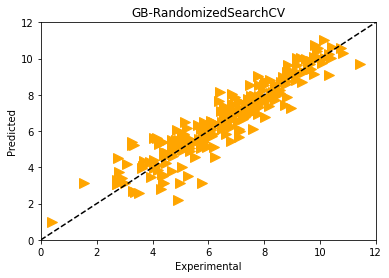

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(0,14,1)
y=x
plt.plot(Y_test,Y_pred,linestyle='none',marker='>',color='orange',ms=10)
plt.plot(x,y,linestyle='--',color='black')
plt.title('GB-RandomizedSearchCV')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('GB-RandomizedSearchCV.jpg')
plt.show()

# **XGB**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=11)
print(xgb.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=11,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

n_estimators = [int(x) for x in np.arange(100,1001,10)]
booster = ['gbtree','dart','gblinear']
lr = [y for y in np.arange(0.005,1.01,0.01)]
max_depth = [int(j) for j in np.arange(1,11,1)]
min_child_weight=[int(x) for x in np.arange(1,20,1)]
colsample_bytree =[x for x in np.arange(0.1,1,0.05)] 
subsample = [x for x in np.arange(0.1,1,0.05)]
gamma = [x for x in np.arange(0.2,1,0.1)]
param_grid = {'n_estimators':n_estimators,'booster':booster,'learning_rate':lr,'max_depth':max_depth,
              'min_child_weight':min_child_weight,'colsample_bytree':colsample_bytree,'subsample':subsample,'gamma':gamma,}

random_search = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=100,
                                   n_jobs=-1,random_state=21,return_train_score=True,cv=10,verbose=1 )
random_search.fit(X_train,Y_train)
print(random_search.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 29.7min finished


[05:55:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'subsample': 0.6500000000000001, 'n_estimators': 680, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.21499999999999997, 'gamma': 0.4000000000000001, 'colsample_bytree': 0.8500000000000002, 'booster': 'dart'}


In [ ]:
xgb = XGBRegressor(n_estimators=680,max_depth=2,learning_rate=0.21499999999999997,booster='dart',min_child_weight=10,
                   colsample_bytree=0.8500000000000002,subsample=0.6500000000000001,gamma=0.4000000000000001,random_state=11)

xgb.fit(X_train,Y_train)
Y_predict = xgb.predict(X_test)

[05:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,Y_predict))
print(np.sqrt(mean_squared_error(Y_test,Y_predict)))

0.8658813144477719
0.7273837399974474


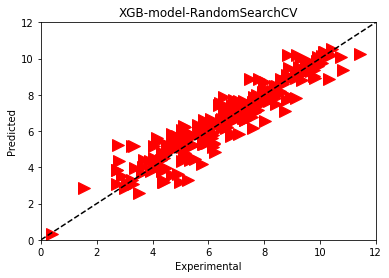

In [ ]:
a = np.arange(0,14,1)
y=a

import matplotlib.pyplot as plt 

plt.plot(Y_test,Y_predict,marker='>',linestyle='none',color='red',ms=12)
plt.plot(a,y,linestyle='--',color='black')
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.xlim(0,12)
plt.ylim(0,12)
plt.title('XGB-model-RandomSearchCV')
plt.savefig('XGB-model-RandomSearchCV.jpg')
plt.show()

# **Tree Parzen Estimator**

# **Tuning RandomForest hyperparameters**

#**Random Forest**

In [ ]:
print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=11, max_features='auto', max_leaf_nodes=27,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=490, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)>


criterion=['mse','mae']
max_depth = [int(x) for x in np.arange(2,30,1)]
max_leaf_nodes = [int(x) for x in np.arange(2,30,1)]
min_samples_leaf = [int(x) for x in np.arange(2,20,1)]
#max_samples=[int(x) for x in np.arange(5,40,1)]
#min_impurity_split=[np.arange(0,1,0.1)]
#min_samples_split=[int(x) for x in np.arange(1,20,1)]
n_estimators=[int(x) for x in np.arange(50,1001,10)]
#min_weight_fraction_leaf = [np.arange(0,1.5,0.1)]
max_features = ['auto','sqrt','log2']


In [ ]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
#import xgboost as xgb
from sklearn.model_selection import KFold #,StratifiedKFold
from sklearn.metrics import mean_squared_error

#rf = (random_state=12)

def objective(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    params['max_depth'] = int(params['max_depth'])
    params['max_leaf_nodes'] = int(params['max_leaf_nodes'])
    #params['subsample'] = float(params['subsample'])
    #params['colsample_bytree'] = float(params['colsample_bytree'])
    #params['min_child_weight'] = float(params['min_child_weight'])
    #params['objective'] = 'reg:linear'
    params['criterion'] = 'mse'
    params['max_features'] = 'auto'
    #params['silent'] = 1
#    params['nthread'] = 10
    #params['seed'] = 2020 #ramdom number seed
   
    global X, y, heatName, best
   
    RANDOM_STATE = 2
    n_folds = 10
    errors = []
   
    kf = KFold(n_folds, random_state=RANDOM_STATE, shuffle = True)
    print('..........................')
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        #features = list(X.columns.values)
        #for i in range(len(features)):
            #features[i] = features[i].replace("[","")
            #features[i] = features[i].replace("]","")
        #xgtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
        #X_val2 = xgb.DMatrix(X_val, label=Y_val, feature_names=features)
        #watchlist = [(xgtrain, 'train'), (X_val2, 'eval')]
        model = RandomForestRegressor(**params,n_jobs=-1,random_state=1141 )
        model.fit(X_train,Y_train)
        Y_val_pred = model.predict(X_val)#, ntree_limit=model.n_estimators)
        errors.append(mean_squared_error(Y_val,Y_val_pred)**0.5)
        print('RF',errors[-1])
   
    error = np.mean(errors)
   
    print("############### Error: {0}".format(error))
    print("############### Prms: ", params)
    print('..........................')
   
    return {
        'loss': error,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }
xgb_space = {
        'n_estimators':hp.quniform('n_estimators',50,3000,10),
        'max_depth':hp.quniform('max_depth',2,30,1), 
        'max_leaf_nodes':hp.quniform('max_leaf_nodes',2,30,1),
        #'min_samples_leaf':hp.quniform('min_samples_leaf',0,0.5,0.005),
        #'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        #'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
        #'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
        #'reg_lambda': hp.quniform('lamdba', 0,1,0.1)
}
                                 
trials = Trials()
best = fmin(objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)
print(best)

..........................
RF
1.7484033500951202
RF
1.9637611207728936
RF
1.9253297483805496
RF
1.770026486139867
RF
1.7632966528976433
RF
1.8828293831043177
RF
1.8472804158659502
RF
1.7118195975015271
RF
1.8517824817443274
RF
1.6897498453975606
############### Error: 1.8154279081899756
############### Prms: 
{'max_depth': 14, 'max_leaf_nodes': 5, 'criterion': 'mse', 'max_features': 'auto'}
..........................
..........................
RF
1.3795522001546205
RF
1.6061267477075893
RF
1.5612696517188498
RF
1.5150438011006329
RF
1.373531740463868
RF
1.4927217697210942
RF
1.433555387878272
RF
1.3816614008434636
RF
1.5598725345975712
RF
1.3203495335702282
############### Error: 1.462368476775619
############### Prms: 
{'max_depth': 24, 'max_leaf_nodes': 16, 'criterion': 'mse', 'max_features': 'auto'}
..........................
..........................
RF
1.4632111661440574
RF
1.6954696972028096
RF
1.6475404235514333
RF
1.5953018732432456
RF
1.461706349887811
RF
1.5764718173117214
R

In [ ]:
rf = RandomForestRegressor(max_depth=21, max_leaf_nodes=30, n_estimators= 2690)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(Y_test,Y_pred))
print(np.sqrt(mse(Y_test,Y_pred)))

0.5502946727254818
1.3319347830132349


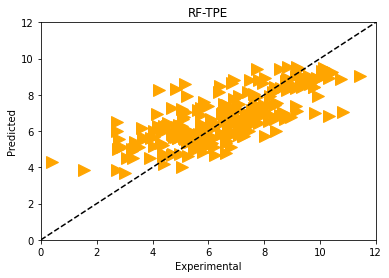

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(0,14,1)
y=x
plt.plot(Y_test,Y_pred,linestyle='none',marker='>',color='orange',ms=12)
plt.plot(x,y,linestyle='--',color='black')
plt.title('RF-TPE')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('RF-TPE.jpg')
plt.show()

In [ ]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
#import xgboost as xgb
from sklearn.model_selection import KFold #,StratifiedKFold
from sklearn.metrics import mean_squared_error

#rf = (random_state=12)

def objective(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    params['max_depth'] = int(params['max_depth'])
    params['max_leaf_nodes'] = int(params['max_leaf_nodes'])
    #params['subsample'] = float(params['subsample'])
    #params['colsample_bytree'] = float(params['colsample_bytree'])
    #params['min_child_weight'] = float(params['min_child_weight'])
    params['loss'] = 'ls'
    params['criterion'] = 'friedman_mse'
    params['max_features'] = 'auto'
    #params['silent'] = 1
#    params['nthread'] = 10
    #params['seed'] = 2020 #ramdom number seed
   
    global X, y, heatName, best
   
    RANDOM_STATE = 2
    n_folds = 10
    errors = []
   
    kf = KFold(n_folds, random_state=RANDOM_STATE, shuffle = True)
    print('..........................')
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        #features = list(X.columns.values)
        #for i in range(len(features)):
            #features[i] = features[i].replace("[","")
            #features[i] = features[i].replace("]","")
        #xgtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
        #X_val2 = xgb.DMatrix(X_val, label=Y_val, feature_names=features)
        #watchlist = [(xgtrain, 'train'), (X_val2, 'eval')]
        model = GradientBoostingRegressor(**params,random_state=1141 )
        model.fit(X_train,Y_train)
        Y_val_pred = model.predict(X_val)#, ntree_limit=model.n_estimators)
        errors.append(mean_squared_error(Y_val,Y_val_pred)**0.5)
        print('GB',errors[-1])
   
    error = np.mean(errors)
   
    print("############### Error: {0}".format(error))
    print("############### Prms: ", params)
    print('..........................')
   
    return {
        'loss': error,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }
xgb_space = {
        'alpha':hp.quniform('alpha',0.1,0.99,0.001),
        'learning_rate':hp.quniform('learning_rate',0.1,1,0.01),
        'max_depth':hp.quniform('max_depth',2,30,1),
        'max_leaf_nodes':hp.quniform('max_leaf_nodes',2,30,1),
        'n_estimators':hp.quniform('n_estimators',50,1000,10)
        #'loss':hp.choice['loss','ls','huber','lad','quantile'],
        #'criterion':hp.choice('criterion','friedman_mse','mse','mae'),
        #'n_estimators':hp.quniform('n_estimators',50,3000,10),
        #'max_depth':hp.quniform('max_depth',2,30,1), 
        #'max_leaf_nodes':hp.quniform('max_leaf_nodes',2,30,1),
        #'min_samples_leaf':hp.quniform('min_samples_leaf',0,0.5,0.005),
        #'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        #'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
        #'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
        #'reg_lambda': hp.quniform('lamdba', 0,1,0.1)
}
                                 
trials = Trials()
best = fmin(objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)
print(best)

..........................
GB
0.7620968181548281
GB
0.9054701665903064
GB
0.7090691914978441
GB
0.8045872665198442
GB
0.6912887440046281
GB
0.727493838489462
GB
0.8001239494141608
GB
0.6579813771377775
GB
0.8132865083809365
GB
0.7128370461463001
############### Error: 0.7584234906336087
############### Prms: 
{'alpha': 0.803, 'learning_rate': 0.27, 'max_depth': 15, 'max_leaf_nodes': 28, 'loss': 'ls', 'criterion': 'friedman_mse', 'max_features': 'auto'}
..........................
..........................
GB
1.0625381409415988
GB
1.2100990734559844
GB
0.9111793488632429
GB
0.8971997729984844
GB
0.8888829548949256
GB
0.8332386637185517
GB
0.9890848110647129
GB
1.017808292208339
GB
1.0069655444245942
GB
0.9484291961804766
############### Error: 0.976542579875091
############### Prms: 
{'alpha': 0.842, 'learning_rate': 0.88, 'max_depth': 26, 'max_leaf_nodes': 28, 'loss': 'ls', 'criterion': 'friedman_mse', 'max_features': 'auto'}
..........................
..........................
GB
0.8

In [ ]:
gb = GradientBoostingRegressor(alpha=0.904, learning_rate=0.43, max_depth=7, max_leaf_nodes=10,n_estimators=700,loss='ls',criterion='friedman_mse',
                               max_features='auto',random_state=27)
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.8467757547235152
0.6044569557771464


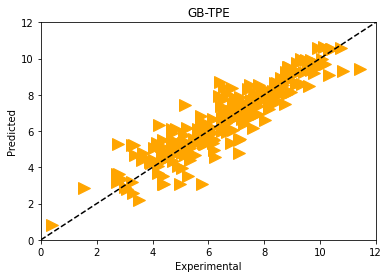

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(0,14,1)
y=x
plt.plot(Y_test,Y_pred,linestyle='none',marker='>',color='orange',ms=12)
plt.plot(x,y,linestyle='--',color='black')
plt.title('GB-TPE')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('GB-TPE.jpg')
plt.show()

# **XGB**

In [ ]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from sklearn.model_selection import KFold #,StratifiedKFold
from sklearn.metrics import mean_squared_error

def objective(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = float(params['learning_rate'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    params['min_child_weight'] = float(params['min_child_weight'])
    params['objective'] = 'reg:linear'
    params['eval_metric'] = 'rmse'
    params['booster'] = 'gbtree'
    params['silent'] = 1
#    params['nthread'] = 10
    params['seed'] = 2020 #ramdom number seed
   
    global X, y, heatName, best
   
    RANDOM_STATE = 2
    n_folds = 10
    errors = []
   
    kf = KFold(n_folds, random_state=RANDOM_STATE, shuffle = True)
    print('..........................')
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        features = list(X.columns.values)
        for i in range(len(features)):
            features[i] = features[i].replace("[","")
            features[i] = features[i].replace("]","")
        xgtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
        X_val2 = xgb.DMatrix(X_val, label=Y_val, feature_names=features)
        watchlist = [(xgtrain, 'train'), (X_val2, 'eval')]
        model = xgb.train(params, xgtrain, num_round, watchlist, early_stopping_rounds=100, verbose_eval=False)
        
        Y_val_pred = model.predict(X_val2, ntree_limit=model.best_ntree_limit)
        errors.append(mean_squared_error(Y_val,Y_val_pred)**0.5)
        print('Xgboost',errors[-1])
   
    error = np.mean(errors)
   
    print("############### Error: {0}".format(error))
    print("############### Prms: ", params)
    print('..........................')
   
    return {
        'loss': error,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }
xgb_space = {
        'n_estimators':hp.quniform('n_estimators',50,3000,10),
        'learning_rate': hp.quniform('eta', 0.005, 0.05, 0.005),
        'max_depth': hp.quniform('max_depth', 3, 14, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
        #'reg_lambda': hp.quniform('lamdba', 0,1,0.1)
}
                                 
trials = Trials()
best = fmin(objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)
print(best)

..........................
Xgboost
0.7909432099152607
Xgboost
0.8979111198007675
Xgboost
0.7489707739888543
Xgboost
0.7994903626723595
Xgboost
0.715298018776469
Xgboost
0.7510435053627146
Xgboost
0.8190465227323872
Xgboost
0.6985225452794271
Xgboost
0.8413969878801761
Xgboost
0.7045293727779478
############### Error: 0.7767152419186364
############### Prms: 
{'colsample_bytree': 0.8500000000000001, 'gamma': 0.85, 'learning_rate': 0.035, 'max_depth': 14, 'min_child_weight': 3.0, 'subsample': 0.9500000000000001, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'booster': 'gbtree', 'silent': 1, 'seed': 2020}
..........................
..........................
Xgboost
0.9059970237457294
Xgboost
0.9471841122813336
Xgboost
0.7929128107848179
Xgboost
0.8429738681520593
Xgboost
0.7617902781921655
Xgboost
0.8038382544161514
Xgboost
0.8825617881968394
Xgboost
0.6904905308914977
Xgboost
0.875835886835437
Xgboost
0.7694188605232495
############### Error: 0.827300341401928
############### Prms: 

In [ ]:
xgb = XGBRegressor(n_estimators=2170,max_depth=3,learning_rate=0.04,booster='gbtree',min_child_weight=2.0,subsample=0.55,
                   colsample_bytree=0.8500000000000001,gamma=0.61,random_state=11)

xgb.fit(X_train,Y_train)
Y_predict = xgb.predict(X_test)

[07:22:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(r2_score(Y_test,Y_predict))
print(np.sqrt(mean_squared_error(Y_test,Y_predict)))

0.8822467478177284
0.6815620486399933


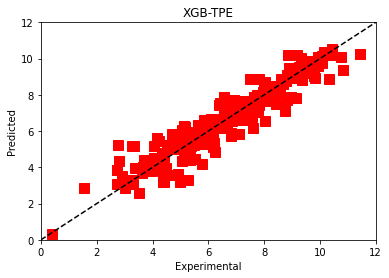

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0,14,1)
y=x

plt.plot(Y_test,Y_predict,linestyle='none',marker='s',ms=10,color='red')
plt.plot(x,y,linestyle='--',color='black')
plt.xlim(0,12)
plt.ylim(0,12)
plt.title('XGB-TPE')
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('XGB-TPE.jpg')
plt.show()

# **Support Vector Machine Regressor**

In [ ]:
from sklearn.svm import SVR

svr = SVR()

print(svr.get_params)

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

C = [x for x in np.arange(0.01,3,0.1)]

coef0 = [x for x in np.arange(0.001,0.999,0.0001)]

kernel = ['poly','rbf','sigmoid','linear']

degree =[int(x) for x in np.arange(2,15)]

gamma = ['scale', 'auto']

epsilon = [x for x in np.arange(0.01,1.5,0.001)]

tol = [x for x in np.arange(0.001,0.1,0.0001)]

param_grid = {'C':C, 'coef0':coef0, 'kernel':kernel, 'degree':degree, 'epsilon':epsilon, 'tol':tol,'gamma':gamma}

rs_cv = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=100, cv=10, n_jobs =-1, random_state=2812,return_train_score=True )

rs_cv.fit(X_train_ss,Y_train)
print(rs_cv.best_params_)

{'tol': 0.0076000000000000035, 'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.3509999999999997, 'degree': 5, 'coef0': 0.6938000000000003, 'C': 2.11}


In [ ]:
svr =SVR(tol=0.0076000000000000035, kernel= 'poly', gamma='auto', epsilon=0.3509999999999997, degree= 5, coef0= 0.6938000000000003, C= 2.11)

svr.fit(X_train_ss,Y_train)
Y_pred = svr.predict(X_test_ss)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2 = ' +str(r2_score(Y_test,Y_pred)))
print('RMSE = ' +str(np.sqrt(mean_squared_error(Y_test,Y_pred))))

R2 = 0.8096974385710691
RMSE = 0.8664455215045145


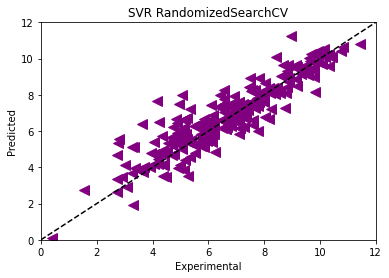

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(0,14,1)
y = x 

plt.plot(Y_test,Y_pred,linestyle='none',marker='<',ms=10,color='purple')
plt.plot(x,y,linestyle='--',color='black')
plt.title('SVR RandomizedSearchCV')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('SVR-RandomizedSearch.jpg')
plt.show()

In [ ]:
Xss = ss.fit_transform(X)

In [ ]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
#import xgboost as xgb
from sklearn.model_selection import KFold #,StratifiedKFold
from sklearn.metrics import mean_squared_error

#rf = (random_state=12)

def objective(params):
    params['C'] = float(params['C'])
    params['epsilon'] = float(params['epsilon'])
    params['coef0'] = float(params['coef0'])
    params['degree'] = int(params['degree'])
    params['tol'] = float(params['tol'])
    params['gamma'] = 'scale'
    params['kernel'] = 'poly'
    #params['max_features'] = 'auto'
    #params['silent'] = 1
#    params['nthread'] = 10
    #params['seed'] = 2020 #ramdom number seed
   
    global X, y, heatName, best
   
    RANDOM_STATE = 2
    n_folds = 10
    errors = []
   
    kf = KFold(n_folds, random_state=RANDOM_STATE, shuffle = True)
    print('..........................')
    for i, (train_index, test_index) in enumerate(kf.split(Xss)):
        X_train, X_val = Xss[train_index], Xss[test_index]
        Y_train, Y_val = Y[train_index], Y[test_index]
        #features = list(X.columns.values)
        #for i in range(len(features)):
            #features[i] = features[i].replace("[","")
            #features[i] = features[i].replace("]","")
        #xgtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
        #X_val2 = xgb.DMatrix(X_val, label=Y_val, feature_names=features)
        #watchlist = [(xgtrain, 'train'), (X_val2, 'eval')]
        model = SVR(**params)
        model.fit(X_train,Y_train)
        Y_val_pred = model.predict(X_val)#, ntree_limit=model.n_estimators)
        errors.append(mean_squared_error(Y_val,Y_val_pred)**0.5)
        print('SVR',errors[-1])
   
    error = np.mean(errors)
   
    print("############### Error: {0}".format(error))
    print("############### Prms: ", params)
    print('..........................')
   
    return {
        'loss': error,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }
xgb_space = {
        'C':hp.quniform('C',0.05,4.5,0.1),
        'coef0':hp.quniform('coef0',0.001,0.999,0.0001),
        #kernel = ['poly','rbf','sigmoid','linear']
        'degree':hp.quniform('degree',2,15,1),
        'epsilon':hp.quniform('epsilon',0.01,1.5,0.001),
        'tol':hp.quniform('tol',0.001,0.1,0.0001)
#        'alpha':hp.quniform('alpha',0.1,0.99,0.001),
#        'learning_rate':hp.quniform('learning_rate',0.1,1,0.01),
#        'max_depth':hp.quniform('max_depth',2,30,1),
#        'max_leaf_nodes':hp.quniform('max_leaf_nodes',2,30,1),
#        'n_estimators':hp.quniform('n_estimators',50,1000,10)
        #'loss':hp.choice['loss','ls','huber','lad','quantile'],
        #'criterion':hp.choice('criterion','friedman_mse','mse','mae'),
        #'n_estimators':hp.quniform('n_estimators',50,3000,10),
        #'max_depth':hp.quniform('max_depth',2,30,1), 
        #'max_leaf_nodes':hp.quniform('max_leaf_nodes',2,30,1),
        #'min_samples_leaf':hp.quniform('min_samples_leaf',0,0.5,0.005),
        #'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        #'gamma': hp.quniform('gamma', 0.5, 1, 0.01),
        #'colsample_bytree': hp.quniform('colsample_bytree', 0.4, 1, 0.05),
        #'reg_lambda': hp.quniform('lamdba', 0,1,0.1)
}
                                 
trials = Trials()
best = fmin(objective,
    space=xgb_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)
print(best)

..........................
SVR
1.5371032505521751
SVR
1.702881807512952
SVR
1.4840630281529588
SVR
1.5020256316593923
SVR
1.4733036522745495
SVR
1.8422365587097513
SVR
1.6031353774880677
SVR
1.5333677167233937
SVR
1.6141758634732282
SVR
1.7577246313534796
############### Error: 1.6050017517899948
############### Prms: 
{'C': 1.8, 'coef0': 0.2089, 'degree': 14, 'epsilon': 1.228, 'tol': 0.09870000000000001, 'gamma': 'scale', 'kernel': 'poly'}
..........................
..........................
SVR
1.0490222400911597
SVR
1.1848439541436209
SVR
1.078030615794725
SVR
1.1480507947264142
SVR
0.9537325674436865
SVR
1.0385980765862437
SVR
1.0945480360934614
SVR
0.9239259234911478
SVR
1.1011736678506503
SVR
0.8941690692746226
############### Error: 1.0466094945495734
############### Prms: 
{'C': 4.1000000000000005, 'coef0': 0.5577, 'degree': 2, 'epsilon': 0.232, 'tol': 0.0661, 'gamma': 'scale', 'kernel': 'poly'}
..........................
..........................
SVR
0.9724090975471611
SVR
1

In [ ]:
svr =SVR(tol=0.0325, kernel= 'poly', gamma='auto', epsilon=0.5670000000000001, degree= 7, coef0= 0.9986, C= 3.4000000000000004)

svr.fit(X_train_ss,Y_train)
Y_pred = svr.predict(X_test_ss)

In [ ]:
print('R2 = ' +str(r2_score(Y_test,Y_pred)))
print('RMSE = ' +str(np.sqrt(mean_squared_error(Y_test,Y_pred))))

R2 = 0.8203061704829494
RMSE = 0.8419484978804356


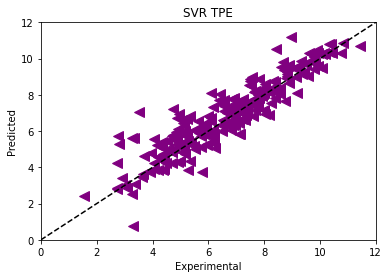

In [ ]:
x = np.arange(0,14,1)
y = x 

plt.plot(Y_test,Y_pred,linestyle='none',marker='<',ms=10,color='purple')
plt.plot(x,y,linestyle='--',color='black')
plt.title('SVR TPE')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('SVR-TPE.jpg')
plt.show()